# importing data 

In [405]:
import pandas as pd
import numpy as np
import interpret.glassbox
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import statsmodels.formula.api as smf
import shap
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,OneHotEncoder, Normalizer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_auc_score
from sklearn.decomposition import PCA
from scipy.stats import shapiro, skew
import warnings
from sklearn.inspection import PartialDependenceDisplay



warnings.filterwarnings("ignore")

In [406]:
train = pd.read_csv("train.csv",index_col=0)
test = pd.read_csv("test.csv",index_col=0)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [407]:
test.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2291,60,RL,110.0,13440,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2007,New,Partial
2245,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,7,2008,WD,Normal
2076,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml


In [408]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,NaN,NaN,NaN,57.378341,42.74688,20.0,20.0,50.0,70.0,190.0
MSZoning,1455,5,RL,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1232.0,NaN,NaN,NaN,68.580357,22.376841,21.0,58.0,67.0,80.0,200.0
LotArea,1459.0,NaN,NaN,NaN,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
Street,1459,2,Pave,1453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,1459.0,NaN,NaN,NaN,58.167923,630.806978,0.0,0.0,0.0,0.0,17000.0
MoSold,1459.0,NaN,NaN,NaN,6.104181,2.722432,1.0,4.0,6.0,8.0,12.0
YrSold,1459.0,NaN,NaN,NaN,2007.769705,1.30174,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1458,9,WD,1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [409]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [411]:
# sns.pairplot(train)

# missing values

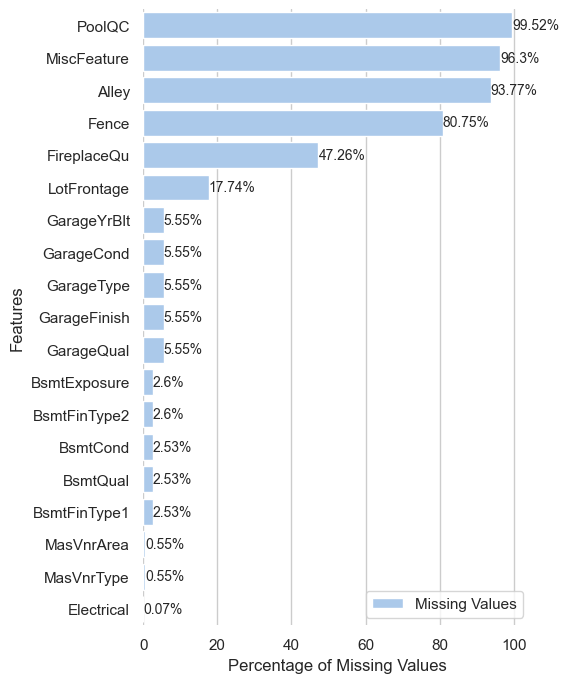

In [412]:
f, ax = plt.subplots(figsize=(5, 8))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

missing_train_table = train.isna().sum().sort_values(ascending=False).apply(lambda x: x/train.shape[0]*100).drop(train.columns[train.isna().sum()==0]).round(2)
sns.barplot(x=missing_train_table, y=missing_train_table.index, color="b", orient="h", ax=ax, label="Missing Values")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Percentage of Missing Values")
ax.set_ylabel("Features")

# Add text labels for each bar with the percentage value
for index, value in enumerate(missing_train_table):
    ax.text(value, index, str(value) + '%', ha='left', va='center', fontsize=10)

sns.despine(left=True, bottom=True)

plt.show()


<Axes: xlabel='PoolQC', ylabel='SalePrice'>

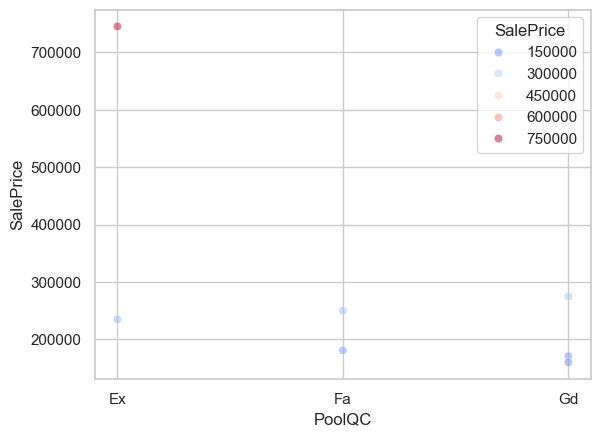

In [413]:
sns.scatterplot(data=train, x='PoolQC', y='SalePrice', hue='SalePrice', palette='coolwarm', alpha=0.5)

In [414]:
train[train['PoolQC']=='Ex']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


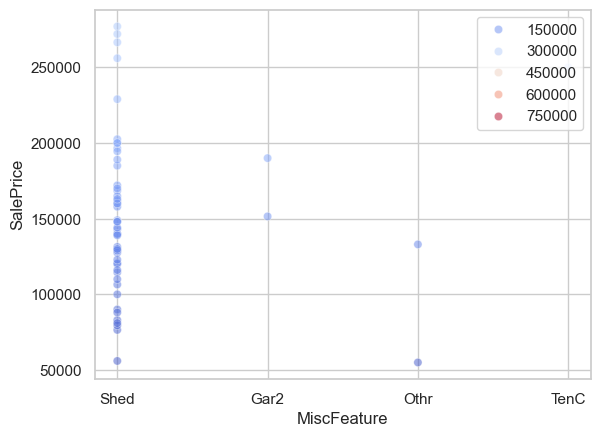

In [415]:
sns.scatterplot(data=train, x='MiscFeature', y='SalePrice', hue='SalePrice', palette='coolwarm', alpha=0.5)
plt.legend(loc='upper right')

In [416]:
train[train['MiscFeature']=='TenC']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000


<Axes: xlabel='Alley', ylabel='SalePrice'>

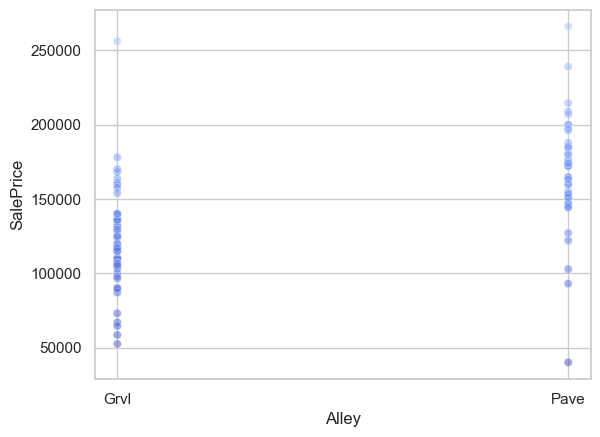

In [417]:
sns.scatterplot(data=train, x='Alley', y='SalePrice', hue='SalePrice', palette='coolwarm', alpha=0.5,legend=False)

(array([ 4.,  4., 11., 14.,  9.,  6.,  1.,  0.,  0.,  1.]),
 array([ 52500.,  72850.,  93200., 113550., 133900., 154250., 174600.,
        194950., 215300., 235650., 256000.]),
 <BarContainer object of 10 artists>)

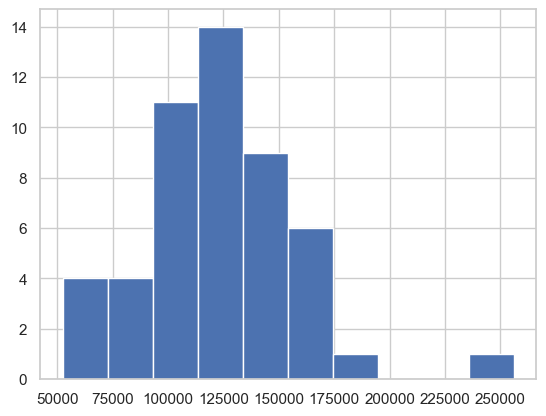

In [418]:
plt.hist(train[train['Alley']=='Grvl'].SalePrice)

(array([ 1.,  0.,  2.,  2.,  7., 12., 10.,  5.,  1.,  1.]),
 array([ 40000. ,  62597.9,  85195.8, 107793.7, 130391.6, 152989.5,
        175587.4, 198185.3, 220783.2, 243381.1, 265979. ]),
 <BarContainer object of 10 artists>)

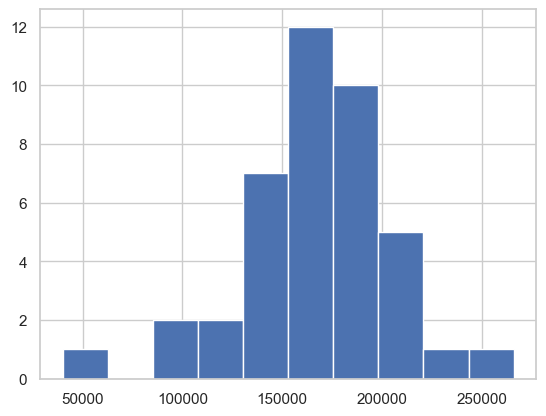

In [419]:
plt.hist(train[train['Alley']=='Pave'].SalePrice)

In [420]:
# give a type of Alley if it is Grvl or Pave we can have a normally distributed Sales Price
# filling  missing alley with 'NA'
train['Alley'].fillna('NA', inplace=True)
test['Alley'].fillna('NA', inplace=True)

<Axes: xlabel='Fence', ylabel='SalePrice'>

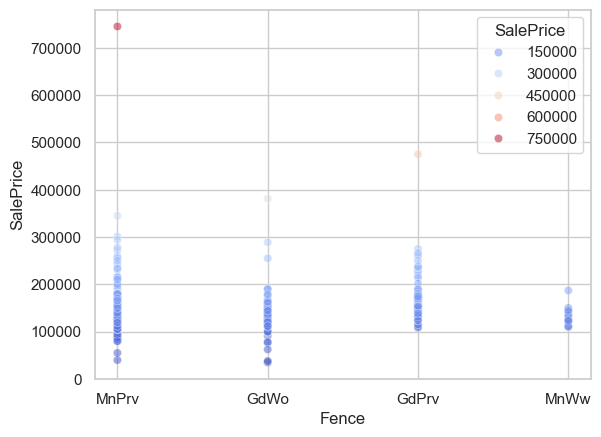

In [421]:
sns.scatterplot(data=train, x='Fence', y='SalePrice', hue='SalePrice', palette='coolwarm', alpha=0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


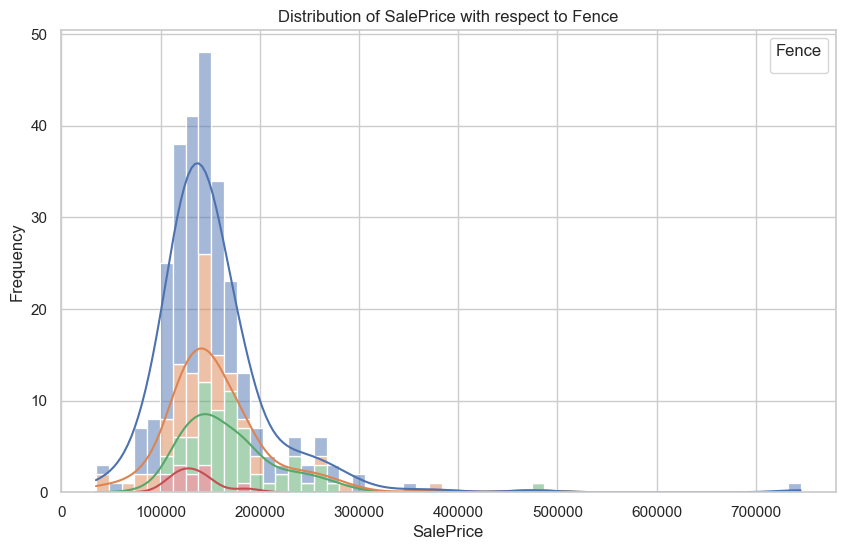

In [422]:


# Create a histplot with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='SalePrice', hue='Fence', multiple='stack', kde=True)
plt.title('Distribution of SalePrice with respect to Fence')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend(title='Fence')
plt.show()

Almost all distribution of SalePrice with respect to Fence have a normal distribution with similar mean and standard deviation

In [423]:
train.shape

(1460, 80)

In [424]:
# Define columns to be dropped due to a high number of missing values
columns_to_drop = ['PoolQC','Fence','MiscFeature']

# Dropping columns with a high percentage of missing values 
train.drop(columns_to_drop, axis=1, inplace=True)
test.drop(columns_to_drop, axis=1, inplace=True)

# dropping rows with missing values 
# but random forest can handle missing values
missing_value_columns = ['Electrical','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
print(f"the percentage of the total rows dropping is {round(train[missing_value_columns].isna().any(axis=1).sum() / train.shape[0] * 100, 2)}%")
print('Dropping missing values...')
train.dropna(subset=missing_value_columns, inplace=True)
train.reset_index(drop=True, inplace=True)

the percentage of the total rows dropping is 8.36%
Dropping missing values...


In [425]:
train.shape

(1338, 77)

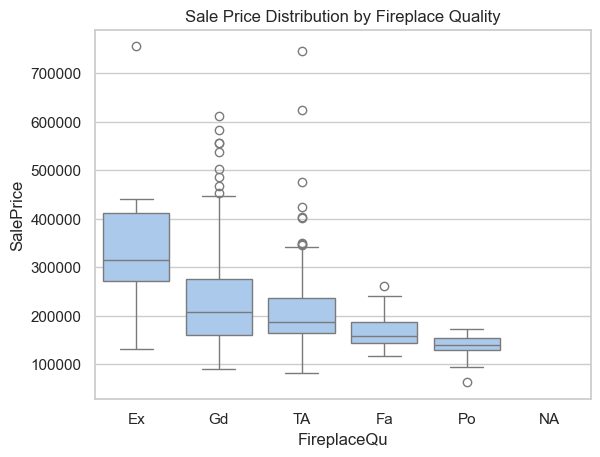

In [426]:
# Create a box plot to compare sale prices across different levels of 'FireplaceQu'
sns.set_palette('pastel')
sns.boxplot(x='FireplaceQu', y='SalePrice', data=train, order=['Ex','Gd','TA','Fa','Po','NA'])
plt.title('Sale Price Distribution by Fireplace Quality')
plt.show()


if the FireplaceQu is 'Ex' or Fa can be a good indicator. <br>
data is not uniform and hence it might be difficult to predict sales price accurately when above 60000. 

In [427]:
train['FireplaceQu'].fillna('NA', inplace=True)
test['FireplaceQu'].fillna('NA', inplace=True)

#### Impute missing values in the training set

In [428]:
# Impute missing values in the training set
medians = train.groupby('Neighborhood')['LotFrontage'].median()
train['LotFrontage'] = train['Neighborhood'].map(medians).fillna(train['LotFrontage'])
test['LotFrontage'] = test['Neighborhood'].map(medians).fillna(test['LotFrontage'])

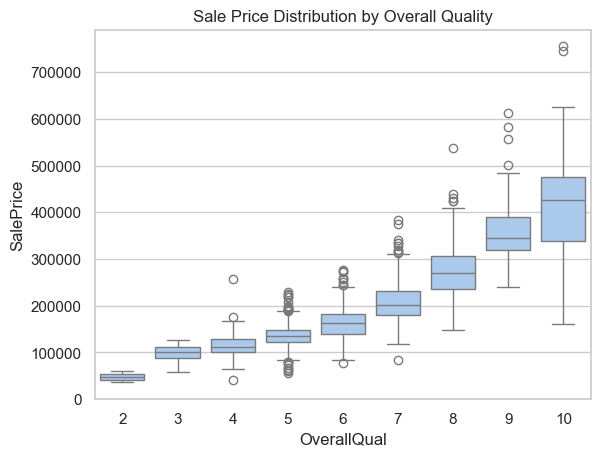

In [429]:
# handling outliers in the training set

# Create a box plot to compare sale prices across different levels of 'OverallQual'
sns.set_palette('pastel')
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('Sale Price Distribution by Overall Quality')
plt.show()

<Axes: >

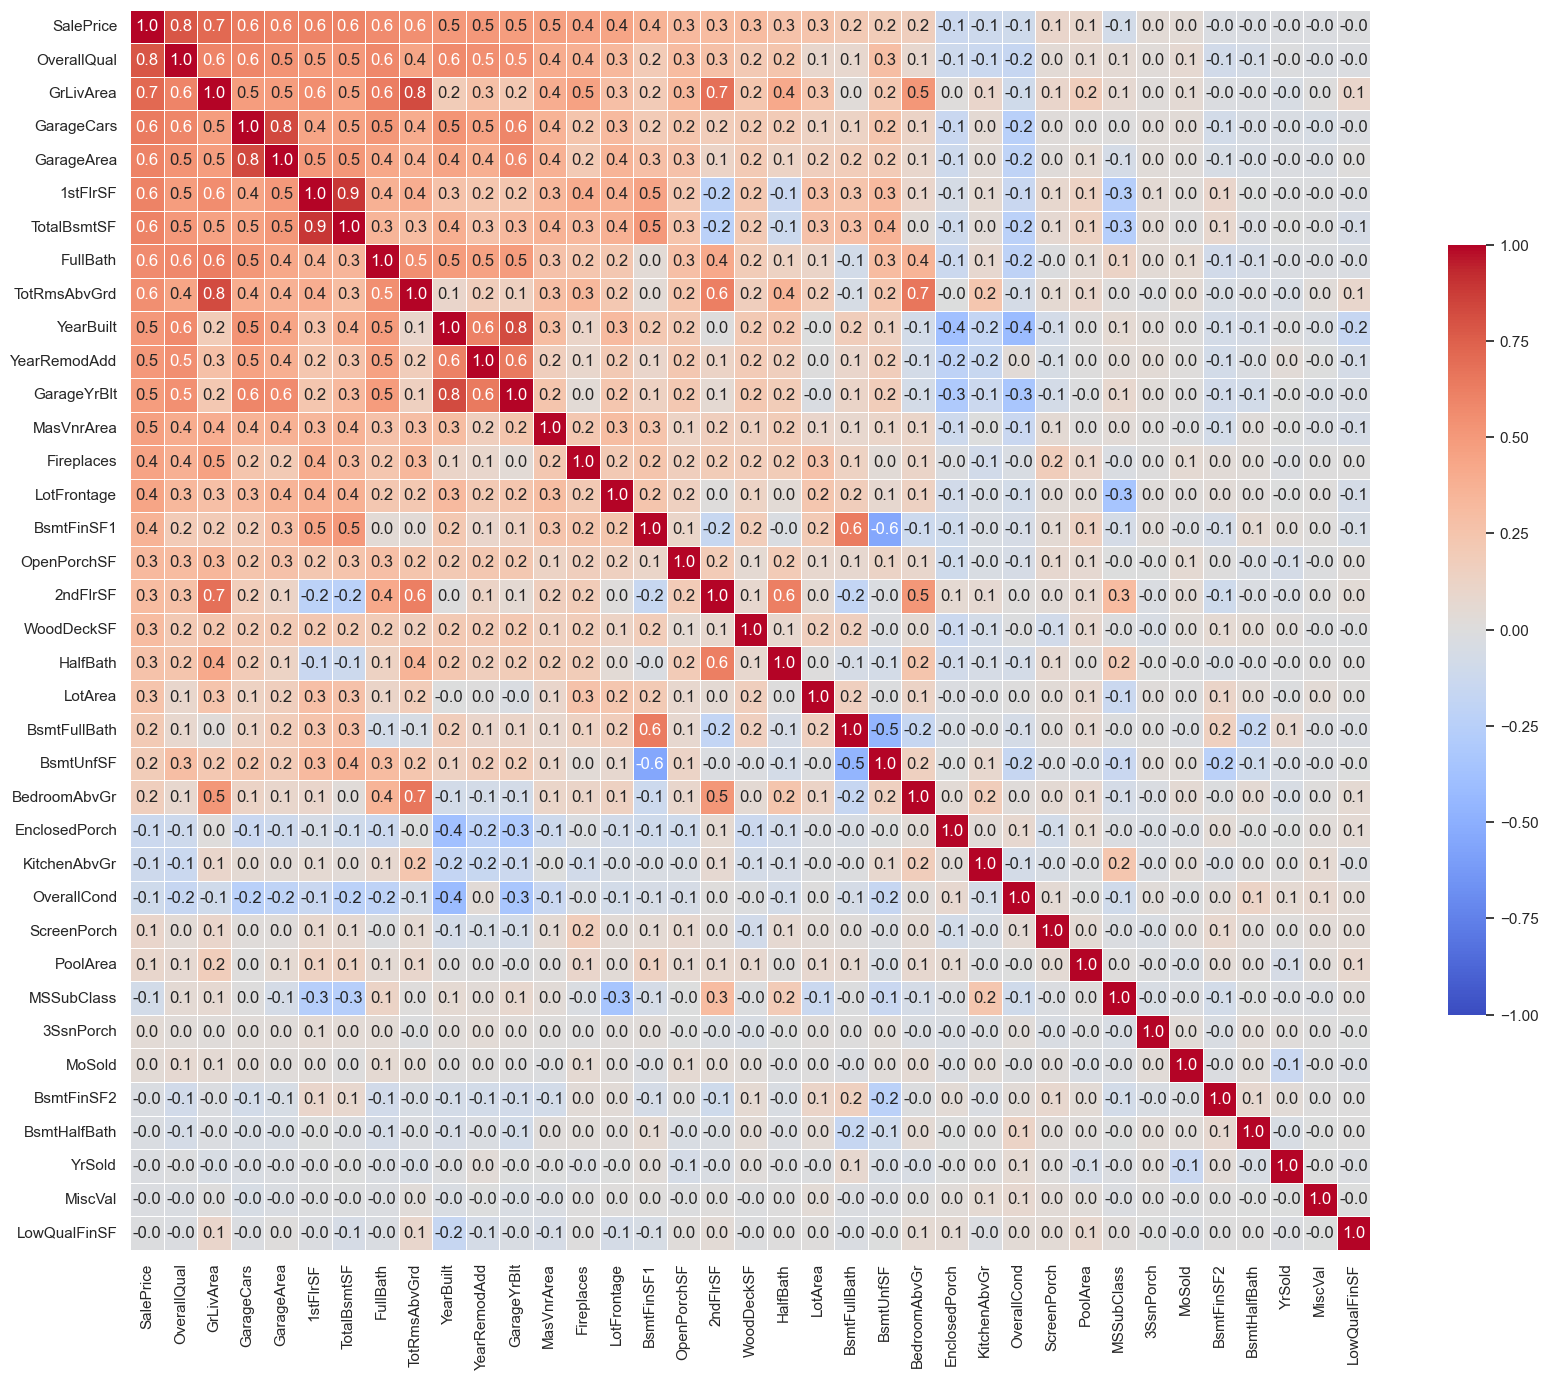

In [430]:
# plotting correlation
df = train.corr(numeric_only=True).abs().sort_values(by='SalePrice', ascending=False)
columns = df.index.to_list()
plt_1 = train[columns]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(plt_1.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.1f')

'OverallQual' and 'GrLivArea' have high correlation with 'SalePrice' <br>
Hence we can use them to fill the missing values & outliers. <br>

In [431]:
# sns.pairplot(data=train, hue='SalePrice', palette='coolwarm')

# Handling Outliers 

<Axes: title={'center': 'Histogram of SalePrice'}, ylabel='Frequency'>

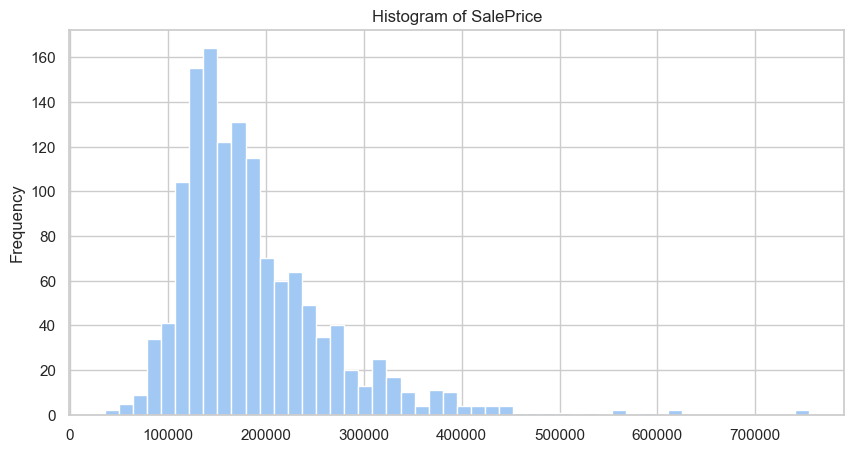

In [432]:
train['SalePrice'].plot(kind='hist', bins=50, figsize=(10,5), title='Histogram of SalePrice', ylabel='Frequency', xlabel='SalePrice', grid=True)

In [433]:
train[train['SalePrice']> 500000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
160,20,RL,61.5,17423,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,7,2009,New,Partial,501837
402,20,RL,88.5,15431,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,170,0,0,4,2009,WD,Normal,555000
632,60,RL,91.0,21535,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2007,WD,Normal,755000
704,60,RL,61.5,53504,Pave,NA,IR2,HLS,AllPub,CulDSac,...,0,0,210,0,0,6,2010,WD,Normal,538000
736,60,RL,88.5,13891,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,192,0,0,1,2009,New,Partial,582933
826,20,RL,88.5,12919,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,New,Partial,611657
955,60,RL,61.5,16056,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,New,Partial,556581
1070,60,RL,91.0,35760,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,7,2006,WD,Normal,625000
1081,60,RL,91.0,15623,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,0,555,0,7,2007,WD,Abnorml,745000


In [434]:
train.drop(train[train['SalePrice']>500000].index, inplace=True)

In [435]:
train.isna().sum().drop(train.columns[train.isna().sum()==0]).round(2)

Series([], dtype: int64)

In [436]:
print(train.shape)
print(test.shape)

(1329, 77)
(1459, 76)


In [437]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1329 non-null   int64  
 1   MSZoning       1329 non-null   object 
 2   LotFrontage    1329 non-null   float64
 3   LotArea        1329 non-null   int64  
 4   Street         1329 non-null   object 
 5   Alley          1329 non-null   object 
 6   LotShape       1329 non-null   object 
 7   LandContour    1329 non-null   object 
 8   Utilities      1329 non-null   object 
 9   LotConfig      1329 non-null   object 
 10  LandSlope      1329 non-null   object 
 11  Neighborhood   1329 non-null   object 
 12  Condition1     1329 non-null   object 
 13  Condition2     1329 non-null   object 
 14  BldgType       1329 non-null   object 
 15  HouseStyle     1329 non-null   object 
 16  OverallQual    1329 non-null   int64  
 17  OverallCond    1329 non-null   int64  
 18  YearBuil

In [438]:
cat_columns_train = train.select_dtypes(include=['object']).columns.tolist()
cat_columns_test = test.select_dtypes(include=['object']).columns.tolist()

num_columns_train = train.select_dtypes(exclude=['object']).columns.tolist()
num_columns_test = test.select_dtypes(exclude=['object']).columns.tolist()

cat_columns = [column for column in set(cat_columns_train + cat_columns_test)]
num_columns = [column for column in set(num_columns_train + num_columns_test)]

In [439]:
data = []
for col in cat_columns:
    data.append({'Column': col, 'Unique Count': train[col].nunique(), 'Unique Values': train[col].unique(), 'Missing Count': train[col].isna().sum()})

pd.DataFrame(data).sort_values(by='Unique Count', ascending=False)

,Column,Unique Count,Unique Values,Missing Count
30,Neighborhood,25,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",0
34,Exterior2nd,16,"[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...",0
9,Exterior1st,14,"[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...",0
16,Condition1,9,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",0
28,SaleType,9,"[WD, New, COD, ConLI, CWD, ConLw, Con, ConLD, ...",0
0,RoofMatl,8,"[CompShg, WdShngl, Metal, WdShake, Membran, Ta...",0
5,Condition2,8,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...",0
1,HouseStyle,8,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...",0
35,Functional,7,"[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]",0
26,SaleCondition,6,"[Normal, Abnorml, Partial, Family, Alloca, Adj...",0


In [440]:
train['Exterior1st'].replace({'Wd Sdng': 'Wd_Sdng'}, inplace=True)
test['Exterior1st'].replace({'Wd Sdng': 'Wd_Sdng'}, inplace=True)
train['Exterior2nd'].replace({'Wd Sdng': 'Wd_Sdng'}, inplace=True)
test['Exterior2nd'].replace({'Wd Sdng': 'Wd_Sdng'}, inplace=True)
train['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd_Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'Stucco', 'AsbShng', 'BrkComm', 'Stone',
       'ImStucc', 'CBlock'], dtype=object)

In [441]:
# refering to the meta data provided we can map the values since it is ordinal
train['Street'] = train['Street'].map({'Pave': True, 'Grvl': False}).astype(bool)
test['Street'] = test['Street'].map({'Pave': True, 'Grvl': False}).astype(bool)
train['CentralAir'] = train['CentralAir'].map({'Y': True, 'N': False}).astype(bool)
test['CentralAir'] = test['CentralAir'].map({'Y': True, 'N': False}).astype(bool)

train['Utilities'] = train['Utilities'].map({'AllPub': 1, 'NoSeWa': 0})
test['Utilities'] = test['Utilities'].map({'AllPub': 1, 'NoSeWa': 0})

ordinal_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
            'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']:
    train[col] = train[col].map(ordinal_map).fillna(-1)
    test[col] = test[col].map(ordinal_map).fillna(-1)

# Handling 'BsmtExposure'
train['BsmtExposure'] = train['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}).fillna(-1)
test['BsmtExposure'] = test['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}).fillna(-1)

In [442]:
test.isna().sum().drop(test.columns[test.isna().sum()==0]).round(2)

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
SaleType         1
dtype: int64

In [443]:
# Create a new column 'SalePrice' with all zeros
test['SalePrice'] = 0
# Combine train and test sets for preprocessing
combined = pd.concat([train, test], axis=0)

In [444]:
for col in cat_columns:
    if col not in ['OverallQual', 'GrLivArea']:  # Corrected condition
        mode_val = combined.groupby(['OverallQual', 'GrLivArea'])[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        combined[col] = combined[col].fillna(mode_val)
    else:
        mode_val = combined[col].mode()[0]
        combined[col] = combined[col].fillna(mode_val)
        
for col in num_columns:
    if col not in ['OverallQual', 'GrLivArea']:  
        median_val = combined.groupby(['OverallQual', 'GrLivArea'])[col].transform(lambda x: x.median() if not x.empty else np.nan)
        combined[col] = combined[col].fillna(median_val)
    else:
        median_val = combined[col].median()
        combined[col] = combined[col].fillna(median_val)

In [445]:
# Fill missing values for categorical columns using mode without grouping
for col in cat_columns:
        mode_val = combined[col].mode()[0]
        combined[col] = combined[col].fillna(mode_val)

# Fill missing values for numerical columns using median without grouping
for col in num_columns:
        median_val = combined[col].median()
        combined[col] = combined[col].fillna(median_val)

In [446]:
combined.isna().sum().drop(combined.columns[combined.isna().sum()==0]).round(2)

Series([], dtype: int64)

In [447]:
one_hot = pd.get_dummies(combined[cat_columns])
combined = pd.concat([combined, one_hot], axis=1)
combined.drop(cat_columns, axis=1, inplace=True)

In [448]:
# Split the combined DataFrame back into train and test
train = combined.iloc[:len(train)]
test = combined.iloc[len(train):]
test.drop('SalePrice', axis=1, inplace=True)

In [449]:
# Ensure the split does not carry over the index from 'combined'
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [450]:
# Confirm the changes
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Columns: 227 entries, MSSubClass to RoofStyle_Shed
dtypes: float64(11), int64(26), uint8(190)
memory usage: 630.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 226 entries, MSSubClass to RoofStyle_Shed
dtypes: float64(11), int64(25), uint8(190)
memory usage: 681.2 KB
None


In [451]:

distribution_summary = []

# Iterate over each column in the DataFrame
for column in train.select_dtypes(include=[ 'float64', 'int64']).columns.drop('SalePrice'):
    # Check if the data in the column is normally distributed
    stat, p_value = shapiro(train[column].dropna()) 
    normal_dist = 'Yes' if p_value > 0.05 else 'No'
    importance = abs(train[['SalePrice', column]].corr()['SalePrice'][column])
    # Determine the skewness of the column data
    skewness = skew(train[column].dropna())  # Drop NA values for skew calculation
    if skewness > 0:
        skew_direction = 'Right'
    elif skewness < 0:
        skew_direction = 'Left'
    else:
        skew_direction = 'Symmetrical'
    
    # Append the results to the list
    distribution_summary.append({
        'Column': column,
        'Normal Distribution': normal_dist,
        'Skewness': abs(skewness),
        'Skew Dir': skew_direction,
        'Corr': '{:.2f}'.format(importance)
    })

# Convert the list to a DataFrame
distribution_summary_df = pd.DataFrame(distribution_summary)
distribution_summary_df = distribution_summary_df.sort_values(by='Skewness', ascending=False)
distribution_summary_df['Skewness'] = distribution_summary_df['Skewness'].apply(lambda x: '{:.2f}'.format(x))
distribution_summary_df = distribution_summary_df.head(6)
distribution_summary_df.reset_index(drop=True, inplace=True)
distribution_summary_df


,Column,Normal Distribution,Skewness,Skew Dir,Corr
0,MiscVal,No,24.52,Right,0.02
1,PoolArea,No,15.33,Right,0.03
2,LotArea,No,12.19,Right,0.24
3,LowQualFinSF,No,10.52,Right,0.01
4,3SsnPorch,No,10.05,Right,0.05
5,KitchenAbvGr,No,5.92,Right,0.12


In [452]:
(train['MiscVal']>0).sum()

47

In [453]:
(train['MiscVal']==0).sum()

1282

<Axes: xlabel='SalePrice', ylabel='MiscVal'>

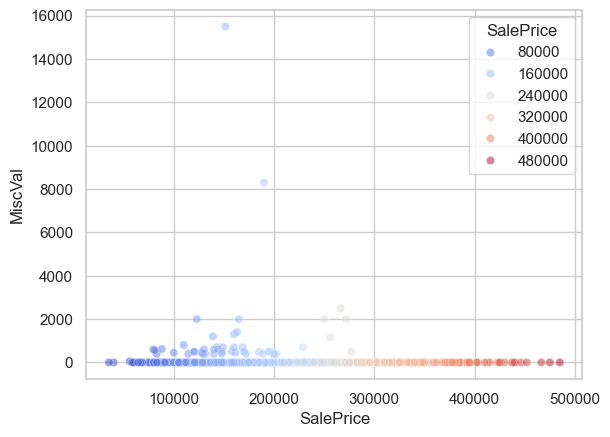

In [454]:
sns.scatterplot(data=train, x='SalePrice', y='MiscVal', hue='SalePrice', palette='coolwarm', alpha=0.5)

<Axes: xlabel='SalePrice', ylabel='PoolArea'>

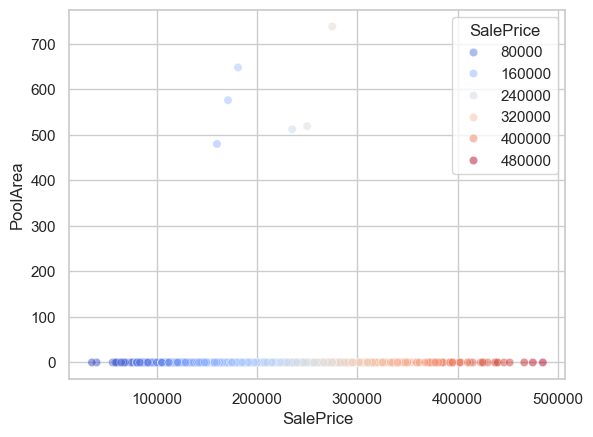

In [455]:
sns.scatterplot(data=train, x='SalePrice', y='PoolArea', hue='SalePrice', palette='coolwarm', alpha=0.5)

We cannot fit a curve with pool Area >0. <br>
since if pool area is between 550 <-> 590 it can have a range of 20 ~ 30,0000 or can be 75,000.

In [456]:
train[(train['PoolArea']>500)&(train['SalePrice']>700000)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional_Typ,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed


In [457]:
train[(train['PoolArea']>500)&(train['SalePrice']>700000)].PoolArea = 0

In [458]:
# dropping MiscVal & PoolArea
train = train.drop(['MiscVal', 'PoolArea'], axis=1)
test = test.drop(['MiscVal', 'PoolArea'], axis=1)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

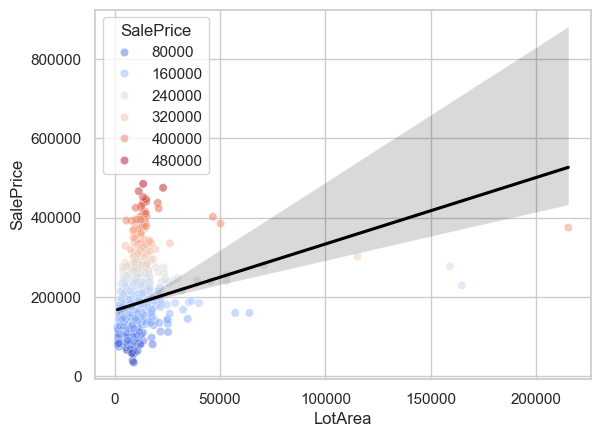

In [459]:
sns.scatterplot(data=train, x='LotArea', y='SalePrice', hue='SalePrice', palette='coolwarm', alpha=0.5)
sns.regplot(data=train, x='LotArea', y='SalePrice', scatter=False, color='black')

In [460]:
# clearly the lot area has some mistakes as typo error hence replacing it with median
train.loc[train['LotArea'] > 110000, 'LotArea'] = train['LotArea'].median()
test.loc[test['LotArea'] > 110000, 'LotArea'] = train['LotArea'].median()

<Axes: xlabel='LowQualFinSF', ylabel='SalePrice'>

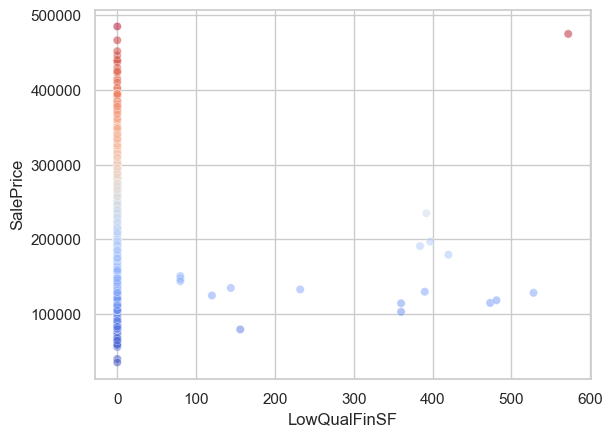

In [461]:
sns.scatterplot(data=train, x='LowQualFinSF', y='SalePrice', hue='SalePrice', palette='coolwarm', alpha=0.5,legend=False)

In [462]:
# Typically, we cannot differentiate when LowQualFinSF is 0.
# However, the outlier occurs when LowQualFinSF is 600 and sale price is 450000.
# Therefore, we set it to 0.
train.loc[train['LowQualFinSF'] > 550, 'LowQualFinSF'] = 0

<Axes: xlabel='3SsnPorch', ylabel='SalePrice'>

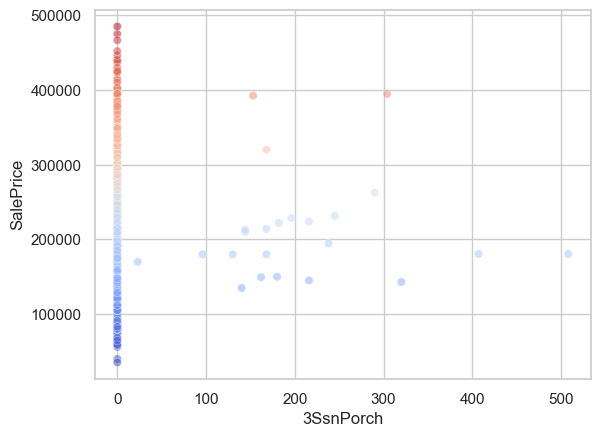

In [463]:
sns.scatterplot(data=train, x='3SsnPorch', y='SalePrice', hue='SalePrice', palette='coolwarm', alpha=0.5,legend=False)

<Axes: xlabel='SalePrice', ylabel='3SsnPorch'>

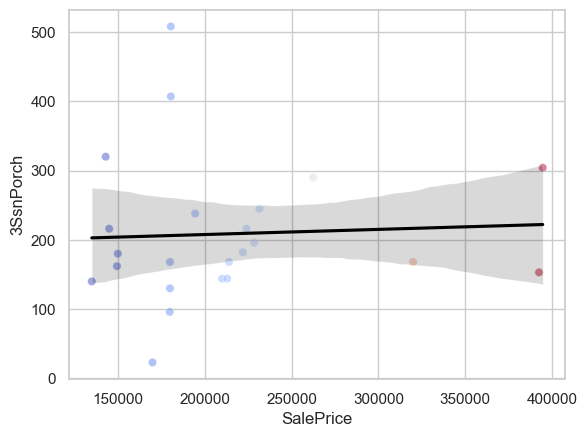

In [464]:
# testing the theory that if 3SsnPorch not 0, then a clear pattern can be shown
sns.scatterplot(data=train[train['3SsnPorch'] > 0], x='SalePrice', y='3SsnPorch', hue='SalePrice', palette='coolwarm', alpha=0.5,legend=False)
sns.regplot(data=train[train['3SsnPorch'] > 0], x='SalePrice', y='3SsnPorch', scatter=False, color='black')

In [465]:
# we can see that most of the points are outside 95% CI 
# hence dropping the column
train = train.drop('3SsnPorch', axis=1)
test = test.drop('3SsnPorch', axis=1)

<Axes: xlabel='SalePrice', ylabel='KitchenAbvGr'>

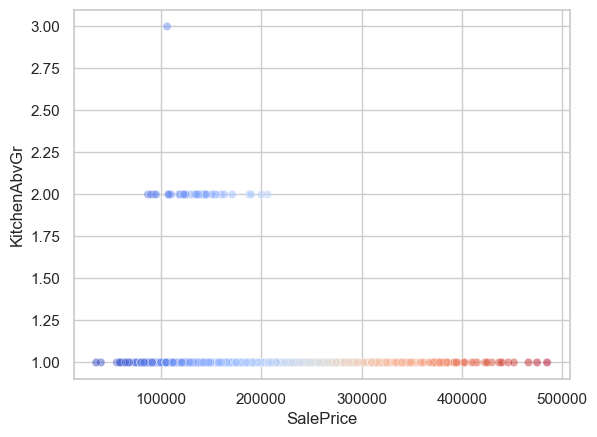

In [466]:
sns.scatterplot(data=train, x='SalePrice', y='KitchenAbvGr', hue='SalePrice', palette='coolwarm', alpha=0.5,legend=False)

KitchenAbvGr will be helpful for trea base application when the decision to split in the final leaf can be based off it.
Else it actrually doesn have any relation to indicate the sale price.

In [467]:
# we split into two methods Linear and non-linear
# Linear method can have better accuracy with PCA
# Non-linear method can have better accuracy with original features


In [468]:
set(test.columns.tolist()) - set(train.columns.tolist())

set()

In [469]:
train.shape

(1329, 224)

In [470]:
ss = StandardScaler()
features = train.drop('SalePrice', axis=1).columns

train_scaled = ss.fit_transform(train.drop('SalePrice', axis=1))
test_scaled = ss.transform(test)

mm = MinMaxScaler()

train_scaled = mm.fit_transform(train_scaled)
test_scaled = mm.transform(test_scaled)

train_scaled_df = pd.DataFrame(train_scaled, columns=features)
test_scaled_df = pd.DataFrame(test_scaled, columns=features)

train_final_df = pd.concat([train_scaled_df, train['SalePrice']], axis=1)
test_final_df = pd.DataFrame(test_scaled_df, columns=features)

In [471]:
df = train_final_df.copy()
df.columns = train_final_df.corr().sort_values(by='SalePrice', ascending=False).index

df = abs(df.corr())

list = df['SalePrice'].sort_values(ascending=False).head(15).index.drop('SalePrice')
list = str(list.to_flat_index().tolist()).replace('[', '').replace(']', '').replace("'","")
list = list.replace(", ", " + ")
list

'Functional_Sev + Neighborhood_Blueste + Exterior2nd_CmentBd + Functional_Maj1 + SaleCondition_AdjLand + Exterior1st_CemntBd + OverallQual + HouseStyle_SLvl + LotFrontage + GrLivArea + MasVnrType_BrkCmn + Functional_Min2 + GarageYrBlt + Foundation_PConc'

In [472]:
# fitting an ordinary leat square regression
from statsmodels.formula.api import ols


model = ols(data=train_final_df, formula='SalePrice ~' + str(list) + ' + 1').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     303.5
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:15:59   Log-Likelihood:                -15768.
No. Observations:                1329   AIC:                         3.157e+04
Df Residuals:                    1314   BIC:                         3.164e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -5.198e+04   5103.777    -10.185      0.000    -6.2e+04    -4.2e+04
Functional_Sev         -8.92e+04   3.59e+04     -2.487      0.013    -1.6e+05   -1.88e+04
Neighborhood_Blueste   2.049e+04   2.48e+04      0.825      0.410   -2.82e+04    6.92e+04
Exterior2nd_CmentBd    4.161e+04   2.49e+04      1.674      0.094   -7159.395    9.04e+04
Functional_Maj1       -3.462e+04   1.11e+04     -3.131      0.002   -5.63e+04   -1.29e+04
SaleCondition_AdjLand  7698.1011   3.46e+04      0.222      0.824   -6.03e+04    7.57e+04
Exterior1st_CemntBd   -1.194e+04   2.48e+04     -0.481      0.631   -6.07e+04    3.68e+04
OverallQual            1.908e+05   8972.400     21.268      0.000    1.73e+05    2.08e+05
HouseStyle_SLvl       -3198.6082   4476.445     -0.715      0.475    -1.2e+04    5583.152
LotFrontage            8.079e+04   6143.015     13.152      0.000    6.87e+04    9.28e+04
GrLivArea              2.516e+05   1.25e+04     20.054      0.000    2.27e+05    2.76e+05
MasVnrType_BrkCmn       240.5656   9378.879      0.026      0.980   -1.82e+04    1.86e+04
Functional_Min2       -8342.8749   6574.566     -1.269      0.205   -2.12e+04    4554.918
GarageYrBlt            3.296e+04   5946.393      5.543      0.000    2.13e+04    4.46e+04
Foundation_PConc       5943.1995   2705.283      2.197      0.028     636.054    1.13e+04
==============================================================================
Omnibus:                      262.811   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6479.475
Skew:                          -0.199   Prob(JB):                         0.00
Kurtosis:                      13.810   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [473]:
import pandas as pd
import statsmodels.formula.api as smf

# Copy DataFrame
df = train_final_df.copy()

# Define a formula including all features except 'SalePrice'
# This step assumes all other columns in df are features
# Define a formula including all features except 'SalePrice'
# This step assumes all other columns in df are features
all_features = [feature for feature in df.columns if feature != 'SalePrice']

# Properly format feature names to handle special characters and spaces
formatted_all_features = ["Q_{}".format(feature) if not feature[0].isalpha() or ' ' in feature or not feature.isalnum() else feature for feature in all_features]
all_features_formula = ' + '.join(formatted_all_features)

# Fit an initial model with all features to evaluate coefficients
initial_model = smf.ols(formula='SalePrice ~ ' + all_features_formula, data=df).fit()

# Assuming the model fitting works without syntax error, continue with the rest of the process

# Extract coefficients (excluding the intercept) and sort by their absolute values
coefficients = initial_model.params.iloc[1:].abs().sort_values(ascending=False)
# coefficients = coefficients.drop('Intercept').abs().sort_values(ascending=False)

# Get the top N features based on sorted coefficients
top_features_by_coeff = coefficients.head(15).index
# top_features_by_coeff = top_features_by_coeff.drop('Intercept')
# Re-format top features if necessary
formatted_top_features = ["Q_{}".format(feature) if not feature[0].isalpha() else feature for feature in top_features_by_coeff]

# Convert the list to a formula string for the final model
formula_list_final = ' + '.join(formatted_top_features)

# Fit the final model using the top features
ols_model = smf.ols(formula='SalePrice ~ ' + formula_list_final, data=df).fit()

# Print the summary of the final model to see coefficients
ols_model.summary()


SyntaxError: invalid syntax (<unknown>, line 1)

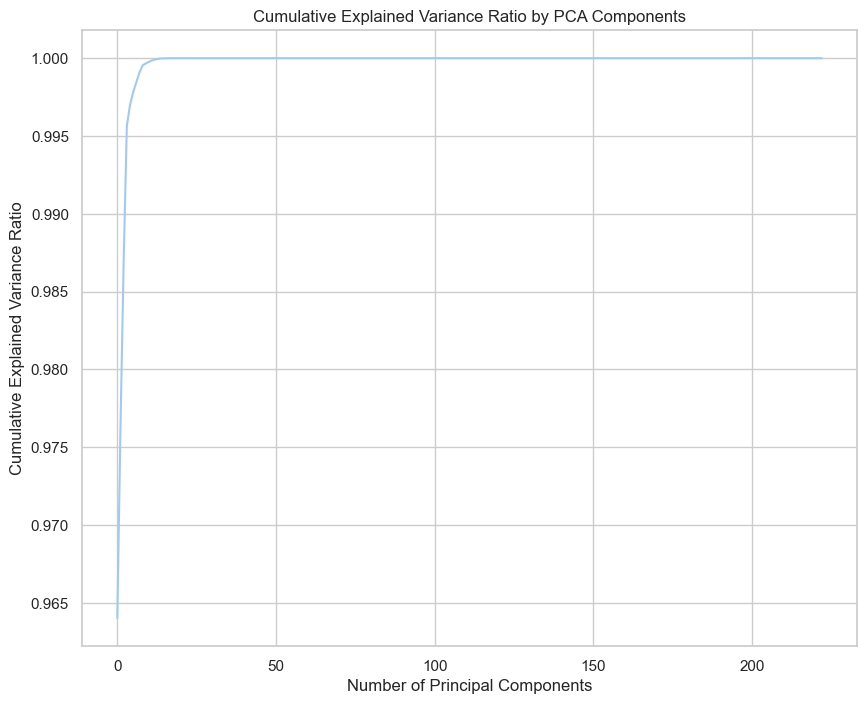

In [474]:
# Apply PCA


pca = PCA()
pca.fit(train.drop('SalePrice', axis=1))

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [475]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9999) + 1

13

In [476]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 223 entries, MSSubClass to RoofStyle_Shed
dtypes: float64(11), int64(22), uint8(190)
memory usage: 647.0 KB


In [477]:

pca = PCA(n_components=13)
pca.fit(train_scaled_df)

train_pca = pca.transform(train_scaled_df)
test_pca = pca.transform(test_scaled_df)

train_pca_df = pd.DataFrame(train_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13'])

y = train['SalePrice'].reset_index(drop=True)

train_final_pca = pd.concat([train_pca_df, y], axis=1)
test_final_pca = pd.DataFrame(test_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13'])

<Axes: >

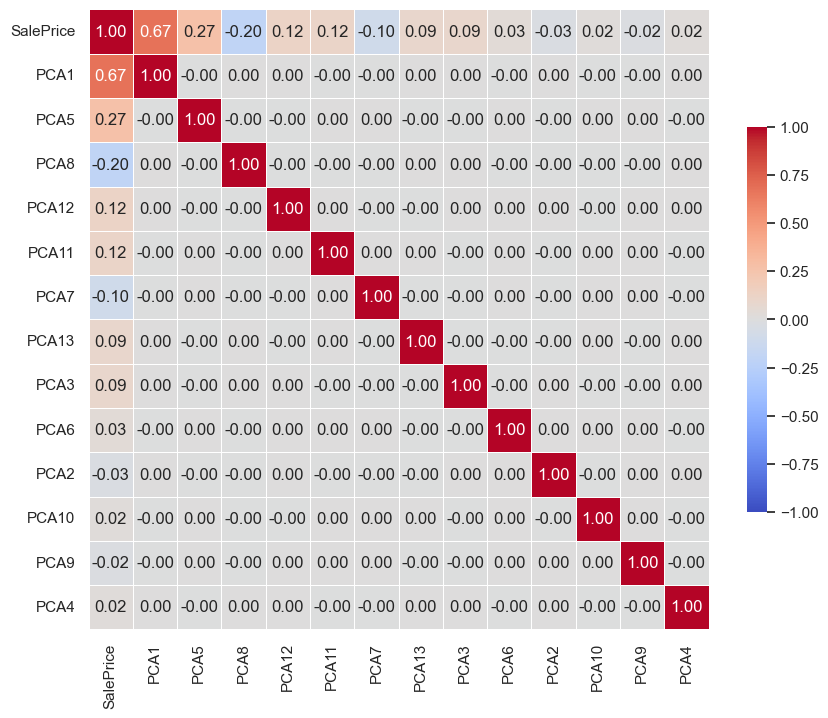

In [478]:
# plotting correlation
df = train_final_pca.corr().abs().sort_values(by='SalePrice', ascending=False)
columns = df.index.to_list()
plt_1 = train_final_pca[columns]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(plt_1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')

<Axes: xlabel='PCA1', ylabel='PCA2'>

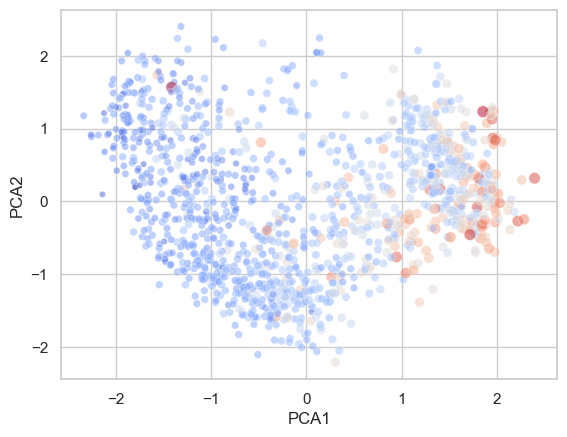

In [479]:
sns.scatterplot(data=train_final_pca, x='PCA1', y='PCA2', hue='SalePrice',size='SalePrice', palette='coolwarm', alpha=0.5,legend=False)

PCA1 & PCA 2 are orthogonal <br>
but there are outliers in PCA1 <br>


<Axes: xlabel='PCA1', ylabel='Count'>

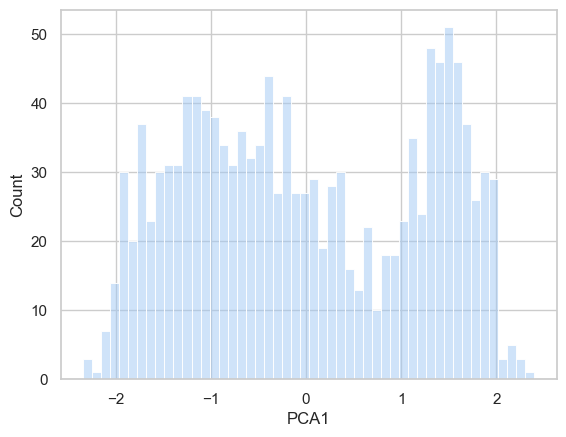

In [480]:
sns.histplot(data=train_final_pca, x='PCA1', palette='coolwarm', alpha=0.5, bins=50)


In [481]:
X = train_final_df.drop('SalePrice', axis=1)
y = train_final_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [482]:
# Define regression models
regression_models = {
    'Lasso': Lasso(max_iter=1000, alpha=0.1, random_state=123),
    'Ridge': Ridge(max_iter=1000, alpha=0.1, random_state=123),
    'ElasticNet': ElasticNet(max_iter=1000, alpha=0.1, l1_ratio=0.5, random_state=123),
    'LinearRegression': LinearRegression(n_jobs=-1),
    'SGDRegressor': SGDRegressor(max_iter=1000, alpha=0.1, random_state=123)
}

In [483]:
# Define regression metrics
regression_metrics = {
    'R2 score': r2_score,
    'MSE': mean_squared_error,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'MAPE': lambda y_true, y_pred: mean_absolute_error(y_true, y_pred) / np.mean(y_true) * 100
}

In [484]:
def evaluate_models(models, metrics, X_train, y_train, cv=5):
    results = []  

    for name, model in models.items():
        model.fit(X_train, y_train)
        
        metric_values = {'Model': name}  
        for metric_name, metric_func in metrics.items():
            scorer = make_scorer(metric_func)
            scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
            metric_values[metric_name] = scores.mean()

        results.append(metric_values)
    
    results_df = pd.DataFrame(results)
    return results_df

In [485]:
evaluate_models(regression_models, regression_metrics, X_train, y_train)

,Model,R2 score,MSE,RMSE,MAE,MAPE
0,Lasso,7.423552e-01,1.180340e+09,3.184600e+04,1.853952e+04,1.016024e+01
1,Ridge,7.456307e-01,1.166679e+09,3.194387e+04,1.868002e+04,1.023191e+01
2,ElasticNet,7.750553e-01,1.057668e+09,3.234614e+04,2.166768e+04,1.184334e+01
3,LinearRegression,-2.458143e+21,9.198644e+30,1.737441e+15,1.908965e+14,1.071248e+11
4,SGDRegressor,7.415760e-01,1.217576e+09,3.473239e+04,2.371874e+04,1.296583e+01


In [486]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Model: {type(model).__name__}")
print(f"R2 score: {r2_score( y_pred, y_test)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_error(y_test, y_pred) / np.mean(y_test) * 100}")

Model: LinearRegression
R2 score: -0.00035075613135582273
MSE: 6.116587184103427e+28
RMSE: 247317350465013.4
MAE: 29972333325993.457
MAPE: 15917667360.092232


In [487]:
evaluate_models(regression_models, regression_metrics, X_train, y_train).sort_values(by='R2 score', ascending=False, ignore_index=True)

,Model,R2 score,MSE,RMSE,MAE,MAPE
0,ElasticNet,7.750553e-01,1.057668e+09,3.234614e+04,2.166768e+04,1.184334e+01
1,Ridge,7.456307e-01,1.166679e+09,3.194387e+04,1.868002e+04,1.023191e+01
2,Lasso,7.423552e-01,1.180340e+09,3.184600e+04,1.853952e+04,1.016024e+01
3,SGDRegressor,7.415760e-01,1.217576e+09,3.473239e+04,2.371874e+04,1.296583e+01
4,LinearRegression,-2.458143e+21,9.198644e+30,1.737441e+15,1.908965e+14,1.071248e+11


Almost all the models give similar results.
selective elastic net is selected as it gives maximum R2 score


In [488]:
# Initialize the RandomizedSearchCV object
rc = RandomizedSearchCV(ElasticNet(), param_distributions={
    'max_iter': [1000, 2000, 3000],
    'alpha': [0.1, 0.5, 1],
    'l1_ratio': [0.5, 0.7, 0.9],
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
    }, cv=5, random_state=123, scoring='r2', n_jobs=-1)

# Fit the RandomizedSearchCV object on the training data
rc.fit(X_train, y_train)

# Get the best model
best_model = rc.best_estimator_

# Evaluate the best model on train, test, and validation sets
print('R2 score Train:', r2_score(y_train, best_model.predict(X_train)))
print('R2 score Test:', r2_score(y_test, best_model.predict(X_test)))
print('R2 score Validation:', r2_score(y_val, best_model.predict(X_val)))

R2 score Train: 0.8707396425381969
R2 score Test: 0.8300341629163661
R2 score Validation: 0.8762505079745541


The best model in linear regression is elastic net with a R2 score of 76.5%

In [489]:
rc.best_estimator_

ElasticNet(alpha=0.1, fit_intercept=False, l1_ratio=0.9, selection='random')

In [490]:
rc.best_params_

{'selection': 'random',
 'max_iter': 1000,
 'l1_ratio': 0.9,
 'fit_intercept': False,
 'alpha': 0.1}

In [491]:
# validating elastic net model on validation set
#applying the best estimators
model = ElasticNet(**rc.best_params_)
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
model.fit(X_train, y_train)
print('R2 score Train:', r2_score(y_train, model.predict(X_train)))
print('R2 score Test:', r2_score(y_test, model.predict(X_test)))
print('R2 score Validation:', r2_score(y_val, model.predict(X_val)))


R2 score Train: 0.8844135633704132
R2 score Test: -2.6486576409103466
R2 score Validation: -2.9447304789573097


In [492]:
train_final_df.sample()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SalePrice
874,0.0,0.714286,0.088107,0.375,0.428571,0.630769,0.2,0.0,0.073884,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,132000


In [493]:
columns = train_final_df.columns.drop('SalePrice')
df = pd.DataFrame({'Feature': columns, 'Coefficient': model.coef_})
filtered_df = df[df['Coefficient'].abs() >= 1]

for i, row in filtered_df.iterrows():
    filtered_df.loc[i, 'Mean'] = train_final_df[row['Feature']].mean()
filtered_df = filtered_df[['Feature','Mean','Coefficient']]

filtered_df.sort_values(by='Coefficient', ascending=False, ignore_index=True)
filtered_df.to_csv('filtered_df.csv', index=False)
filtered_df.head(15)

,Feature,Mean,Coefficient
0,MSSubClass,0.212942,-137.167004
1,LotFrontage,0.698022,333.462777
3,OverallQual,0.524831,14257.621563
4,OverallCond,0.514243,5228.948644
5,YearBuilt,0.714053,-13.089181
6,YearRemodAdd,0.592463,-7.739061
7,MasVnrArea,0.066860,16.854768
8,BsmtFinSF1,0.081150,3.194123
9,BsmtFinSF2,0.033342,6.859346
11,TotalBsmtSF,0.163777,-3.015432


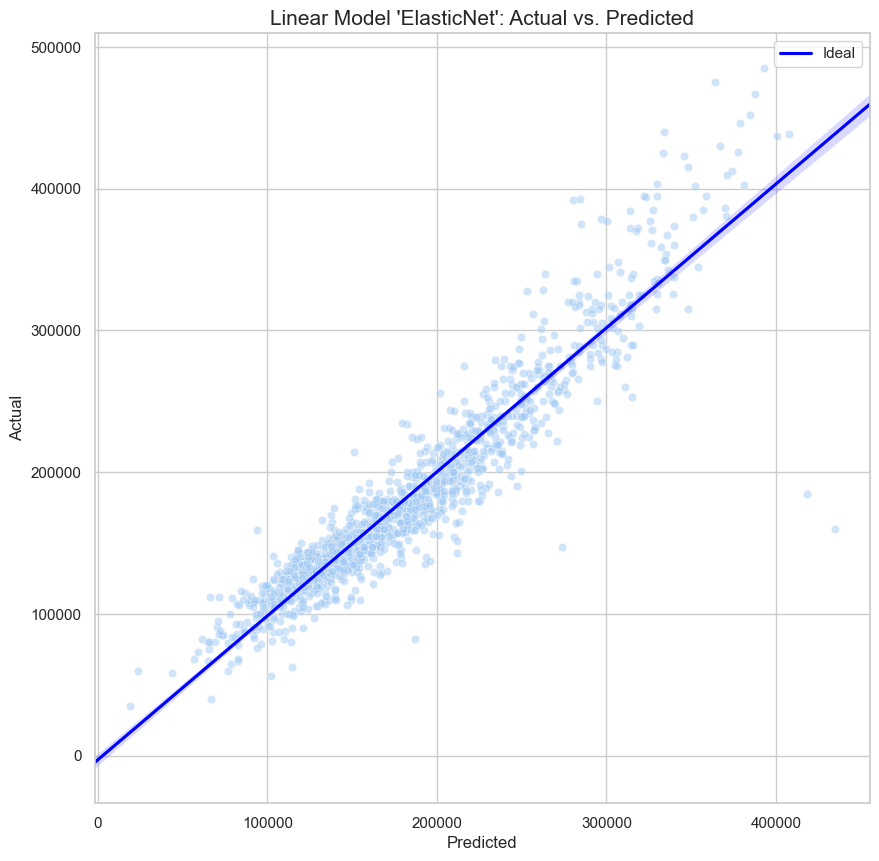

In [494]:
fig , ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x = model.predict(X_train), y = y_train, alpha=0.5, palette='coolwarm', legend=True)
sns.regplot(x = model.predict(X_train), y = y_train, color = 'black', scatter=False, line_kws={'color': 'blue'}, label='Ideal', truncate=False, scatter_kws={'alpha': 0.5},ci=80)
plt.legend(loc='upper right')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Linear Model 'ElasticNet': Actual vs. Predicted", fontsize=15)

plt.show()

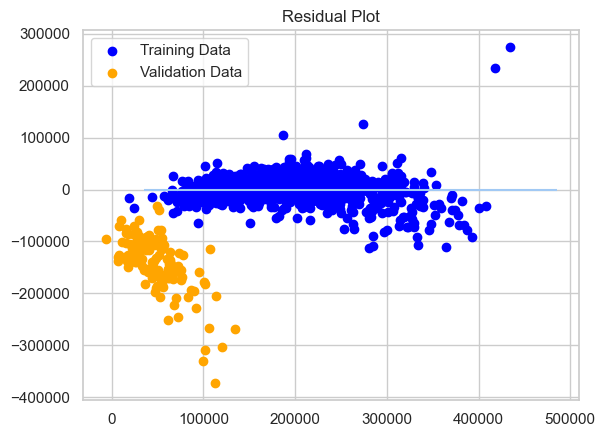

In [495]:
# polotting a p-p plot
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_val), model.predict(X_val) - y_val, c="orange", label="Validation Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot")
plt.show()

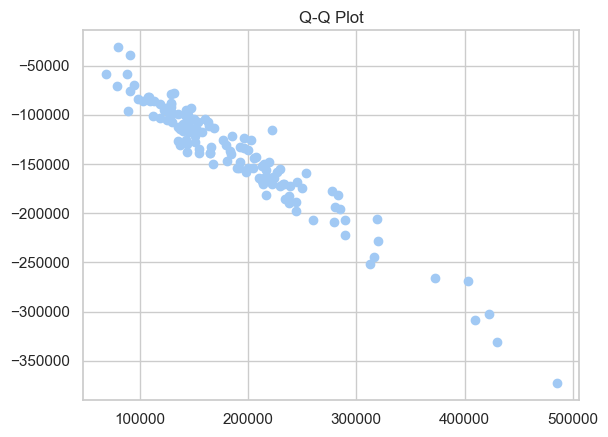

In [496]:
#plotting a Q-Q plot

residuals = model.predict(X_val) - y_val
plt.scatter(y_val, residuals)
plt.title("Q-Q Plot")
plt.show()

In [497]:
# Non lionear methods : 

X = train_final_df.drop('SalePrice', axis=1)
y = train_final_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [498]:
summary= []

In [499]:
# However, ensure cross-validation is applied to assess model generalization.

In [500]:
random_forest = RandomForestRegressor(random_state=123, n_estimators=100, max_depth= 24, max_features='sqrt', n_jobs=-1)
# max depth will determine the depth but based on correlation  we can explain 90% of the output by 24 features. 
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=24, max_features='sqrt', n_jobs=-1,
                      random_state=123)

In [501]:
random_forest.score(X_test, y_test)

0.797509238817782

In [502]:
summary.append(['Random Forest', random_forest.score(X_test, y_test), random_forest.score(X_val, y_val), random_forest.score(X_train, y_train)])

In [503]:
# xgboost
xgboost = XGBRegressor(random_state=123, n_jobs=-1)
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

In [504]:
xgboost.score(X_test, y_test)

0.8589840671601195

In [505]:
summary.append(['XGBoost', xgboost.score(X_test, y_test), xgboost.score(X_val, y_val), xgboost.score(X_train, y_train)])

In [506]:
# lightgbm
lightgbm = LGBMRegressor(random_state=123, n_jobs=-1) 
lightgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2944
[LightGBM] [Info] Number of data points in the train set: 1063, number of used features: 135
[LightGBM] [Info] Start training from score 182759.002822


LGBMRegressor(n_jobs=-1, random_state=123)

In [507]:
lightgbm.score(X_test, y_test)

0.86020275519866

In [508]:
summary.append(['LightGBM', lightgbm.score(X_test, y_test), lightgbm.score(X_val, y_val), lightgbm.score(X_train, y_train)])

In [509]:
#Neural Network
neural_network = MLPRegressor(hidden_layer_sizes=(100, 100, 100), 
                              activation='relu', 
                              solver='adam', 
                              alpha=0.0001, 
                              batch_size='auto', 
                              learning_rate='constant', 
                              learning_rate_init=0.001, 
                              power_t=0.5, 
                              max_iter=200, 
                              shuffle=True, 
                              random_state=123,
                              tol=0.0001,
                              verbose=False,
                              warm_start=False,
                              momentum=0.9, 
                              nesterovs_momentum=True, 
                              early_stopping=False, 
                              validation_fraction=0.1,
                              beta_1=0.9, 
                              beta_2=0.999, 
                              epsilon=1e-08, 
                              n_iter_no_change=10, 
                              max_fun=15000)
neural_network.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100, 100), random_state=123)

In [510]:
neural_network.score(X_test, y_test)

0.7684187480344391

In [511]:
summary.append(['Neural Network ', neural_network.score(X_test, y_test), neural_network.score(X_val, y_val), neural_network.score(X_train, y_train)])

In [512]:
# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(random_state=123)
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [513]:
gradient_boosting.score(X_test, y_test)

0.8537336050320999

In [514]:
summary.append(['Gradient Boosting', gradient_boosting.score(X_test, y_test), gradient_boosting.score(X_val, y_val), gradient_boosting.score(X_train, y_train)])

In [515]:
# K-Nearest Neighbors
k_nearest_neighbors = KNeighborsRegressor()
k_nearest_neighbors.fit(X_train, y_train)

KNeighborsRegressor()

In [516]:
k_nearest_neighbors.score(X_test, y_test)

0.6656480396861889

In [517]:
summary.append(['K-Nearest Neighbors', k_nearest_neighbors.score(X_test, y_test),k_nearest_neighbors.score(X_val, y_val), k_nearest_neighbors.score(X_train, y_train)])

In [518]:
# Extreme Learning Machine
extreme_learning_machine = ExtraTreesRegressor(random_state=123, n_jobs=-1)
extreme_learning_machine.fit(X_train, y_train)

ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [519]:
extreme_learning_machine.score(X_test, y_test)

0.8187883204941842

In [520]:
summary.append(['Extreme Learning Machine (ELM)', extreme_learning_machine.score(X_test, y_test), extreme_learning_machine.score(X_val, y_val), extreme_learning_machine.score(X_train, y_train)])

In [521]:
summary = pd.DataFrame(summary, columns=['Model', 'R2 score Test', 'R2 score Validation', 'R2 score Train'])
# penalizing for over fitting
summary['selection'] = (1- abs((2 * summary['R2 score Train']) - summary['R2 score Validation'] - summary['R2 score Test'])) * summary['R2 score Test']* summary['R2 score Validation']
summary['selection'] = summary['selection'].rank(ascending=False)
summary.sort_values(by='selection', ascending=True, inplace=True)
summary


,Model,R2 score Test,R2 score Validation,R2 score Train,selection
4,Gradient Boosting,0.853734,0.886285,0.962891,1.0
3,Neural Network,0.768419,0.820079,0.815459,2.0
2,LightGBM,0.860203,0.877845,0.985440,3.0
1,XGBoost,0.858984,0.878003,0.999791,4.0
6,Extreme Learning Machine (ELM),0.818788,0.884910,0.999993,5.0
0,Random Forest,0.797509,0.844767,0.979316,6.0
5,K-Nearest Neighbors,0.665648,0.641239,0.793742,7.0


Extreme Learning Machine (ELM) has over fit the train and its valid not selecting it. 
LightGBM & gradient boosting has desent results.

Text(0, 0.5, 'Features')

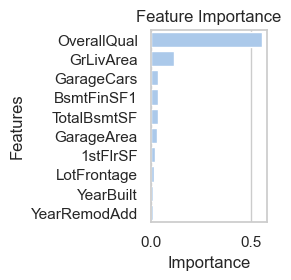

In [522]:
randomForest = RandomForestRegressor(random_state=123)
randomForest.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(1.5,2.5))
data = pd.Series(randomForest.feature_importances_, index=X_train.columns)
data = data.sort_values(ascending=False)
data = data.head(10)
sns.barplot(x=data, y=data.index, ax=ax)
ax.set_title("Feature Importance")
ax.set_xlabel("Importance")
ax.set_ylabel("Features")


In [523]:

# Hyper parameter tuning for gradient boosting
rs = RandomizedSearchCV(
    GradientBoostingRegressor(),
    param_distributions={
        'n_estimators': [10, 50, 100, 200, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
        'subsample': [0.5, 0.7, 0.9, 1.0],
        'max_features': [0.5, 0.7, 1.0],
        'max_depth': [3, 5, 10, 20, 50, 100],
        'min_samples_split': [2, 5, 10, 20, 50, 100],
        'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100]
        },
    cv=5,
    n_jobs=-1,
    random_state=123,
    scoring='r2',
    n_iter=10,
    verbose=1
    )

In [524]:
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'max_depth': [3, 5, 10, 20, 50, 100],
                                        'max_features': [0.5, 0.7, 1.0],
                                        'min_samples_leaf': [1, 2, 5, 10, 20,
                                                             50, 100],
                                        'min_samples_split': [2, 5, 10, 20, 50,
                                                              100],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000],
                                        'subsample': [0.5, 0.7, 0.9, 1.0]},
                   random_state=123, scoring='r2', verbose=1)

In [525]:
rs.best_params_

{'subsample': 0.7,
 'n_estimators': 500,
 'min_samples_split': 50,
 'min_samples_leaf': 2,
 'max_features': 0.5,
 'max_depth': 100,
 'learning_rate': 0.01}

In [526]:
print(rs.score(X_test, y_test), rs.score(X_val, y_val), rs.score(X_train, y_train))

0.8684908881043788 0.886149991331389 0.9846130353047163


We can consider non-linear method for final model.

In [527]:
final_model = GradientBoostingRegressor(**rs.best_params_)
X_train = train_final_df.drop(['SalePrice'], axis=1)
y_train = train_final_df['SalePrice']
X_test = test_final_df

final_model.fit(X_train, y_train)
prediction = final_model.predict(X_test)

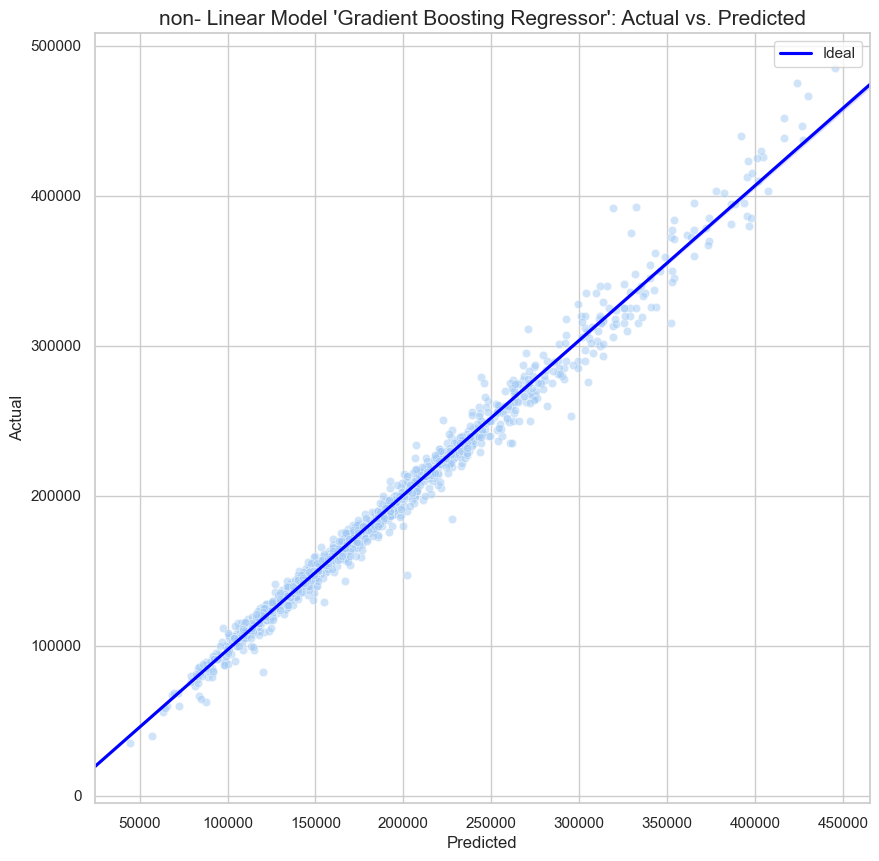

In [529]:
fig , ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x = final_model.predict(X_train), y = y_train, alpha=0.5, palette='coolwarm', legend=True)
sns.regplot(x = final_model.predict(X_train), y = y_train, color = 'black', scatter=False, line_kws={'color': 'blue'}, label='Ideal', truncate=False, scatter_kws={'alpha': 0.5},ci=80)
plt.legend(loc='upper right')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("non- Linear Model 'Gradient Boosting Regressor': Actual vs. Predicted", fontsize=15)

plt.show()

In [535]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Functional_Typ', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed'],
      dtype='object', length=223)

In [536]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Functional_Typ', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed'],
      dtype='object', length=223)

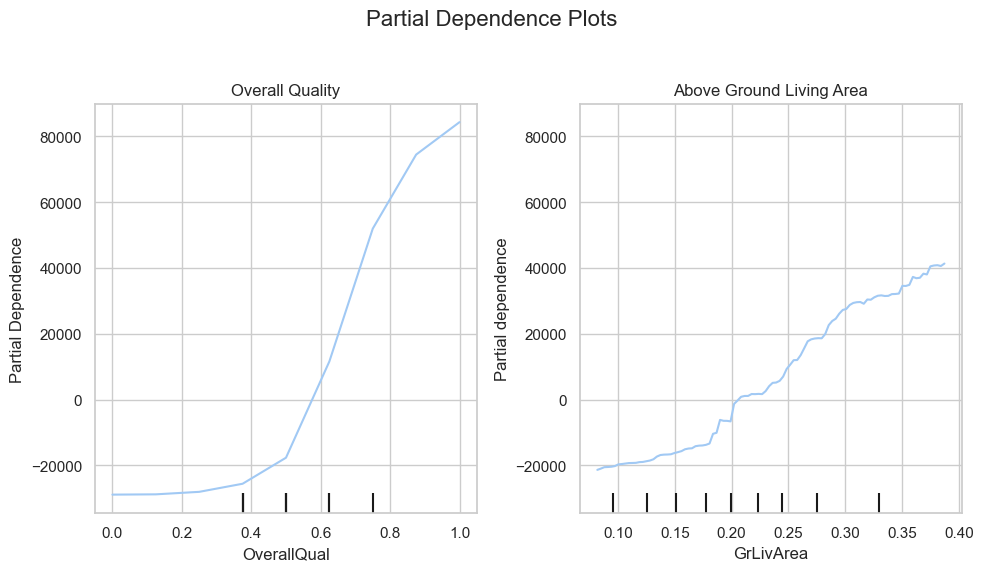

In [537]:
_, ax = plt.subplots(ncols=2, figsize=(10, 6))  # Create a figure and a set of subplots
PartialDependenceDisplay.from_estimator(final_model, X_train, features=["OverallQual", "GrLivArea"], ax=ax)
_.suptitle("Partial Dependence Plots", fontsize=16)
ax[0].set_title("Overall Quality")
ax[0].set_xlabel("OverallQual")
ax[0].set_ylabel("Partial Dependence")
ax[1].set_title("Above Ground Living Area")
ax[1].set_xlabel("GrLivArea")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


Computing partial dependence plots and individual conditional expectation...
done in 1.516s


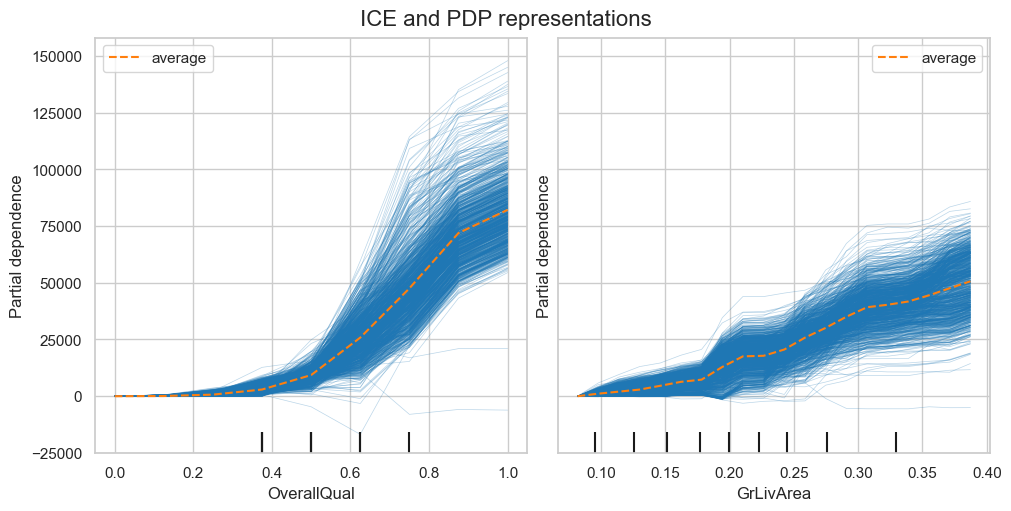

In [538]:

print("Computing partial dependence plots and individual conditional expectation...")
tic = time()

_, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True, constrained_layout=True)

features_info = {
    "features": ["OverallQual","GrLivArea"],
    "kind": "both",
    "centered": True
}

display = PartialDependenceDisplay.from_estimator(
    final_model,
    X_train,
    **features_info,
    ax=ax,
    **{"grid_resolution": 20},
)
print(f"done in {time() - tic:.3f}s")
_ = display.figure_.suptitle("ICE and PDP representations", fontsize=16)

In [539]:
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)


ExplainableBoostingRegressor(interactions=0)

In [540]:
# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X)
shap_values_ebm = explainer_ebm(X)

PermutationExplainer explainer: 1330it [02:21,  8.97it/s]                          


PermutationExplainer explainer: 1330it [02:21,  8.67it/s]                          


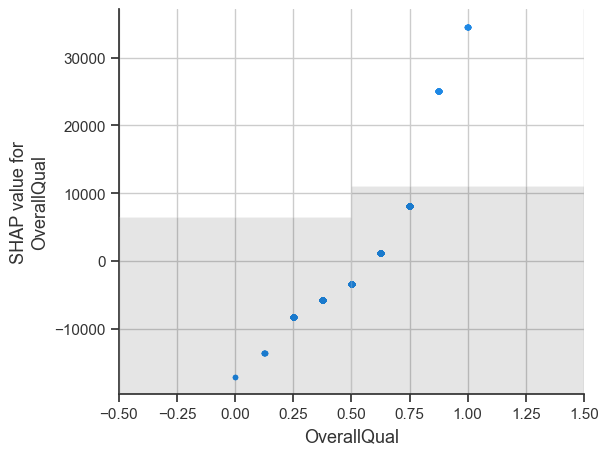

In [541]:
import shap

# Train your Explainable Boosting Regressor model
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# Create a SHAP explainer object for the EBM model
explainer_ebm = shap.Explainer(model_ebm.predict, X)

# Compute SHAP values
shap_values_ebm = explainer_ebm(X)

# Visualize the SHAP values for a single feature using a dependence plot
shap.plots.scatter(shap_values_ebm[:, "OverallQual"])


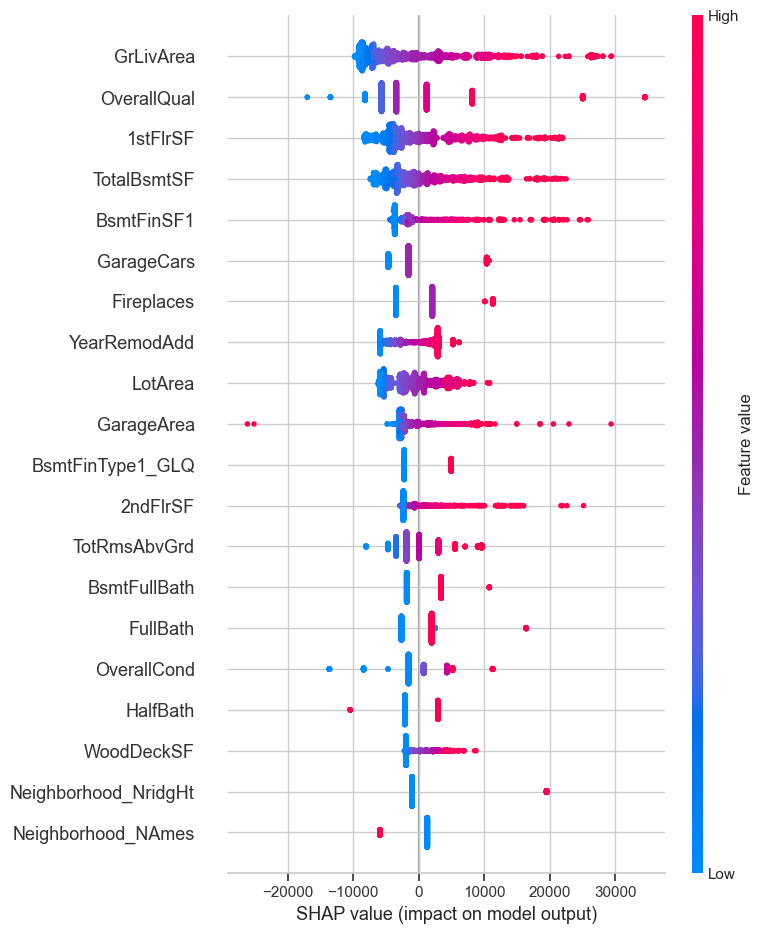

In [542]:
shap.summary_plot(shap_values_ebm, X)

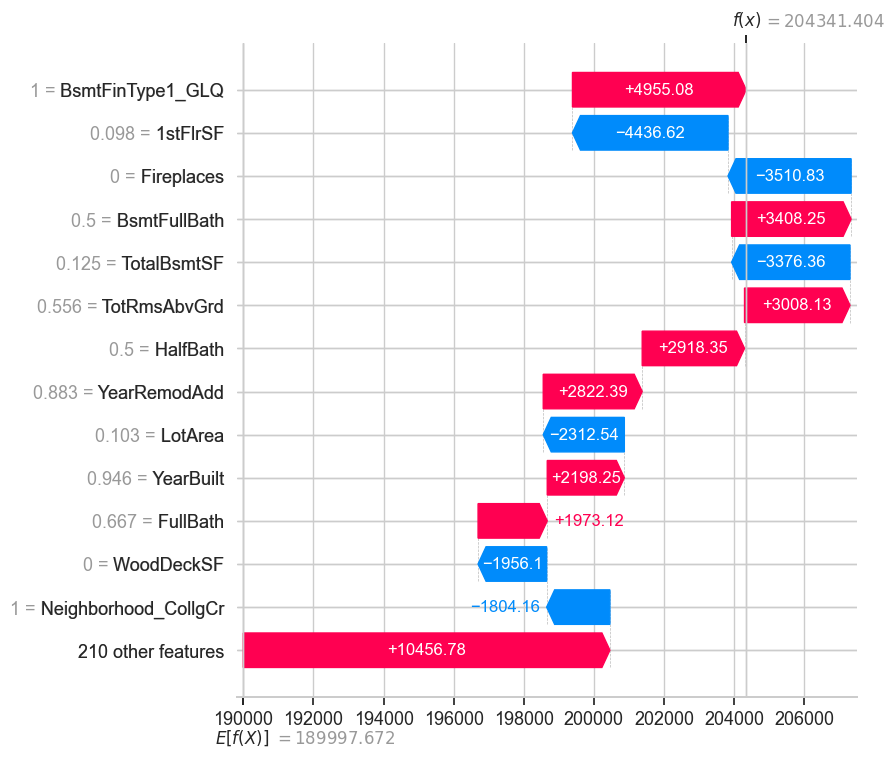

In [543]:
shap.plots.waterfall(shap_values_ebm[0, :], max_display=14,)

In [544]:
data = pd.DataFrame({'Actual': y_train, 'Predicted': final_model.predict(X_train).round(0)})
data

,Actual,Predicted
0,208500,206661.0
1,181500,178327.0
2,223500,221286.0
3,140000,150333.0
4,250000,272067.0
...,...,...
1324,175000,173980.0
1325,210000,205870.0
1326,266500,268643.0
1327,142125,143145.0


In [545]:
X_train.columns.to_list()[0:10]

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2']

In [546]:
prediction = pd.DataFrame(prediction)
prediction.columns = ['SalePrice']

In [547]:
# adding column of ID
test_2 = pd.read_csv("test.csv")
prediction['Id'] = test_2['Id']


In [548]:
prediction = prediction[['Id', 'SalePrice']]